In [1]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:46454 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 20 Memory: 49.03 GB


In [2]:
import uproot 

import dask
import lightgbm as lgb
import xgboost as xgb
import dask_xgboost as dxgb

# from root_pandas import to_root

ModuleNotFoundError: No module named 'lightgbm'

In [11]:
# test_model = xgb.Booster(model_file='./xgb_v1.fold0.json')
# test_model = lgb.Booster(model_file='./test_campaign_v3_LGB_12Mar.fold0.txt')

variables = ['pt_1',
             'pt_2',
             'jpt_1',
             'jpt_2',
             'dijetpt',
             'jdeta',
             'njets',
             'm_fast',
             'mjj',
             'm_vis',
             'puppimt_1',
             'pt_tt',
             'puppimet']

In [12]:
def get_df(path_to_file, tree_name, variables):
    branches = variables + ['evt']
    data_tree = uproot.open(path_to_file)[tree_name]
    data = data_tree.pandas.df(branches)
    return data

In [15]:
%%time
file_name_list = ['mt-NOMINAL_ntuple_VV.root', 'mt-NOMINAL_ntuple_W.root', 'mt-NOMINAL_ntuple_data.root']
inpath = '/nfs/dust/cms/user/rasp/storage/cardinia/2017/OutputDNN/March28/predictions_2017'
predictions = []

model = lgb.Booster(model_file='/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/2017/models/test_campaign_v3_LGB_12Mar.fold0.txt')
for i, file_name in enumerate(file_name_list):  
    data = dask.delayed(get_df)(f'{inpath}/{file_name}', 'TauCheck', variables)
    prediction = dask.delayed(model.predict)(data[variables])

#     data = get_df(f'{inpath}/{file_name}', 'TauCheck', variables)
#     prediction = model.predict(data[variables])
#     model = lgb.Booster(model_file='./test_campaign_v3_LGB_12Mar.fold0.txt')


#     data['prediction'] = prediction
#     outdata = dask.delayed(pd.DataFrame)({'prediction': prediction[:, 0], 'evt': data.evt})
#     to_root(outdata, 'pred_' + path_to_file.split('/')[-1])
#     prediction = dask.delayed(get_prediction)(f'{inpath}/{file_name}', 'TauCheck', variables)

    predictions.append(prediction)

CPU times: user 69.7 ms, sys: 68.2 ms, total: 138 ms
Wall time: 151 ms


In [16]:
%%time
dask.compute(*predictions)

CPU times: user 5min 26s, sys: 13.9 s, total: 5min 40s
Wall time: 6min 49s


(array([[0.07991058, 0.32416185, 0.59592757],
        [0.05765651, 0.20119068, 0.74115281],
        [0.22967312, 0.70820837, 0.06211851],
        ...,
        [0.38958236, 0.01679166, 0.59362598],
        [0.75812141, 0.0458879 , 0.19599069],
        [0.20456678, 0.00376238, 0.79167084]]),
 array([[0.01928152, 0.07473523, 0.90598326],
        [0.19996779, 0.74168561, 0.05834661],
        [0.01528845, 0.01549293, 0.96921862],
        ...,
        [0.35572235, 0.12436674, 0.5199109 ],
        [0.34407948, 0.00775667, 0.64816386],
        [0.16370928, 0.5209432 , 0.31534752]]),
 array([[0.70493786, 0.13387827, 0.16118386],
        [0.34197252, 0.5366635 , 0.12136397],
        [0.11779588, 0.5544666 , 0.32773752],
        ...,
        [0.00353364, 0.01659693, 0.97986943],
        [0.19789527, 0.71557279, 0.08653195],
        [0.50069943, 0.23256188, 0.26673869]]))

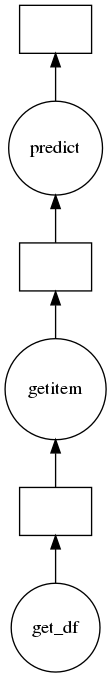

In [11]:
predictions[1].visualize()